K-Nearest Neighbors  
Naive Bayes  
Decision Tree  
Random Forest  
XgBoost  
Support Vector Machine  
Neural Network

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [3]:
import warnings
warnings.filterwarnings('ignore')
# read file
#voice=pd.read_csv('../input/voice.csv')
voice=pd.read_csv('voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Preprocessing: label encoder and normalization

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [7]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


Visualization

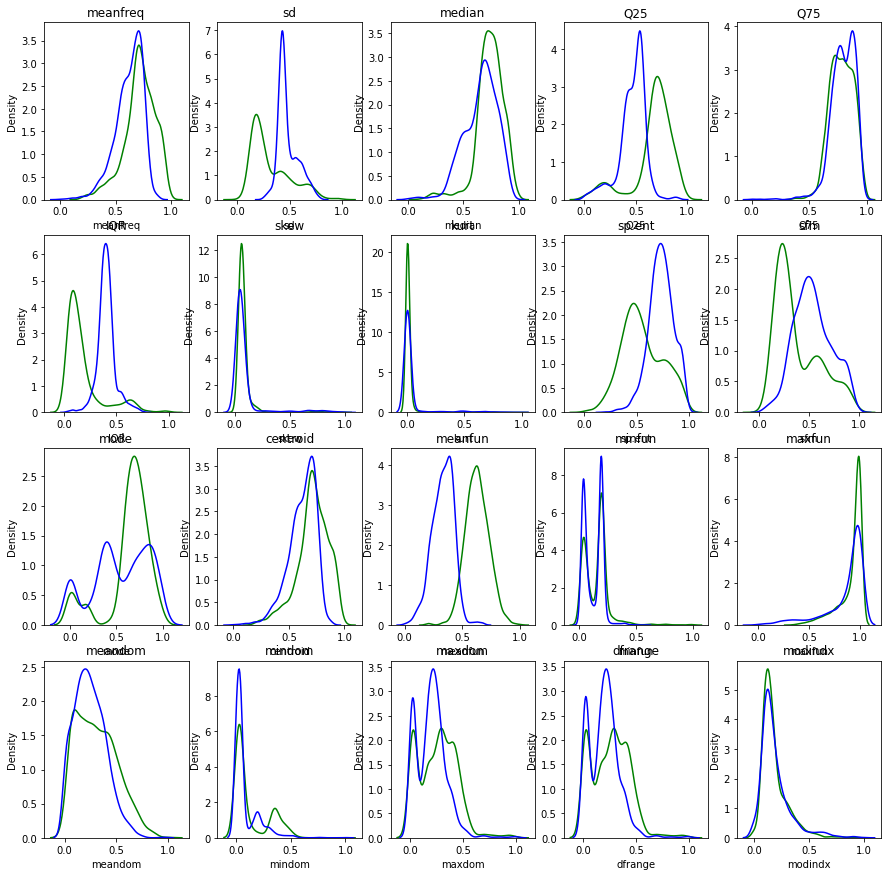

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [10]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [11]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2422,0.804564,0.154652,0.797725,0.776217,0.797305,0.084739,0.067746,0.005534,0.407593,0.204816,0.677233,0.804564,0.685611,0.194037,0.990585,0.400939,0.402151,0.394210,0.386266,0.089308,0.0
1658,0.517507,0.681546,0.666707,0.248876,0.753233,0.590302,0.067789,0.009366,0.930118,0.890253,0.753950,0.517507,0.789271,0.038425,0.880415,0.079850,0.006452,0.030021,0.030043,0.402535,0.0
1758,0.521446,0.463233,0.651982,0.344754,0.641929,0.382653,0.083642,0.009087,0.686052,0.618049,0.670143,0.521446,0.584307,0.042006,0.594812,0.263915,0.006452,0.284132,0.284335,0.172258,0.0
2476,0.842335,0.247808,0.813636,0.828695,0.893371,0.123353,0.085782,0.009452,0.402894,0.253935,0.726496,0.842335,0.711909,0.216466,0.972570,0.389886,0.040860,0.278413,0.277897,0.101288,0.0
2547,0.762080,0.175762,0.758677,0.735901,0.787934,0.117569,0.050078,0.002886,0.518384,0.265586,0.678571,0.762080,0.662756,0.202281,0.937749,0.444000,0.040860,0.986061,0.986052,0.037619,0.0


In [12]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [13]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [14]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

## K-Nearest Neighbors
Using neighbors.KNeighborsClassifier() to build the model.

In [15]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.024185068349106203 occurs at k=4.


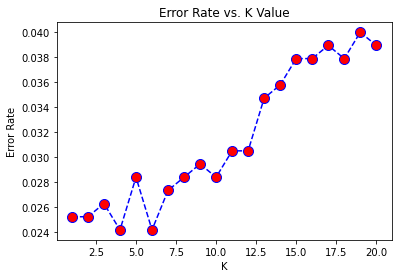

In [16]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [17]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9760    0.9779    0.9769       498
        male     0.9757    0.9735    0.9746       453

    accuracy                         0.9758       951
   macro avg     0.9758    0.9757    0.9758       951
weighted avg     0.9758    0.9758    0.9758       951



Lowest error is 0.031545741324921134 occurs at k=7.


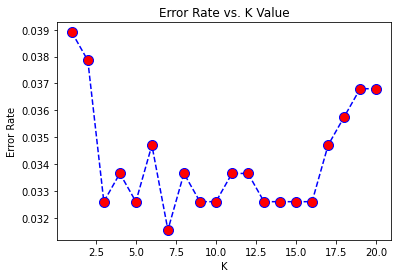

In [18]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [19]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9777    0.9699    0.9738       498
        male     0.9672    0.9757    0.9714       453

    accuracy                         0.9727       951
   macro avg     0.9725    0.9728    0.9726       951
weighted avg     0.9727    0.9727    0.9727       951



## Naive Bayes
Using naive_bayes.GaussianNB() to build the model.

In [20]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9208    0.8876    0.9039       498
        male     0.8811    0.9161    0.8983       453

    accuracy                         0.9012       951
   macro avg     0.9010    0.9018    0.9011       951
weighted avg     0.9019    0.9012    0.9012       951



In [21]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9773    0.9518    0.9644       498
        male     0.9485    0.9757    0.9619       453

    accuracy                         0.9632       951
   macro avg     0.9629    0.9638    0.9632       951
weighted avg     0.9636    0.9632    0.9632       951



## Decision Tree
Using tree.DecisionTreeClassifier() to build the model.

In [22]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.03785488958990536 occurs at n=8.


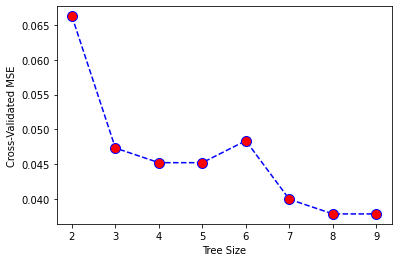

In [23]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [24]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9639    0.9639    0.9639       498
        male     0.9603    0.9603    0.9603       453

    accuracy                         0.9621       951
   macro avg     0.9621    0.9621    0.9621       951
weighted avg     0.9621    0.9621    0.9621       951



Lowest error is 0.03470031545741325 occurs at n=9.


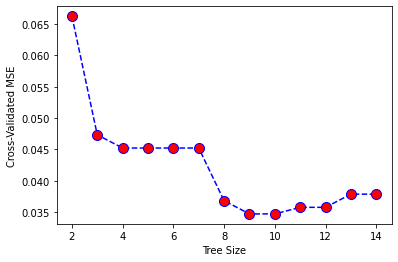

In [25]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

In [26]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9774    0.9558    0.9665       498
        male     0.9526    0.9757    0.9640       453

    accuracy                         0.9653       951
   macro avg     0.9650    0.9658    0.9653       951
weighted avg     0.9656    0.9653    0.9653       951



## Random Forest
Using ensemble.RandomForestClassifier() to build the model.

In [27]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.027339642481598318 occurs at n=21.


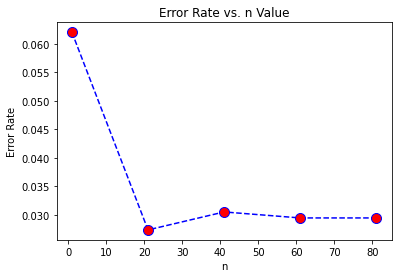

In [28]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [29]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9738    0.9699    0.9718       498
        male     0.9670    0.9713    0.9692       453

    accuracy                         0.9706       951
   macro avg     0.9704    0.9706    0.9705       951
weighted avg     0.9706    0.9706    0.9706       951



Lowest error is 0.031545741324921134 occurs at n=21.


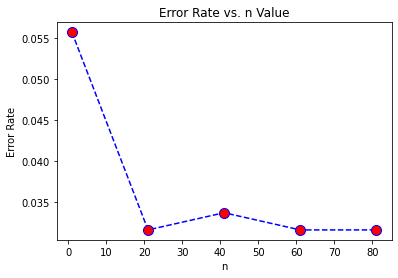

In [30]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

In [31]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9717    0.9639    0.9677       498
        male     0.9606    0.9691    0.9648       453

    accuracy                         0.9664       951
   macro avg     0.9661    0.9665    0.9663       951
weighted avg     0.9664    0.9664    0.9664       951



## XgBoost
Using xgboost.XGBClassifier() to build the model.

In [32]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9739    0.9739    0.9739       498
        male     0.9713    0.9713    0.9713       453

    accuracy                         0.9727       951
   macro avg     0.9726    0.9726    0.9726       951
weighted avg     0.9727    0.9727    0.9727       951



In [33]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9733    0.9498    0.9614       498
        male     0.9462    0.9713    0.9586       453

    accuracy                         0.9600       951
   macro avg     0.9597    0.9606    0.9600       951
weighted avg     0.9604    0.9600    0.9601       951



## Support Vector Machine
Using svm.SVC() to build the model.

In [34]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [35]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [36]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9828597203428056
rbf  out-of-sample accuracy in SVM:  0.9695057833859095
poly  in-sample accuracy in SVM:  0.984212900315742
poly  out-of-sample accuracy in SVM:  0.9716088328075709
linear  in-sample accuracy in SVM:  0.9792512404149752
linear  out-of-sample accuracy in SVM:  0.9652996845425867
Highest accuracy is 0.9716088328075709 occurs at poly kernel.


Lowest error is 0.026288117770767613 occurs at C=9.


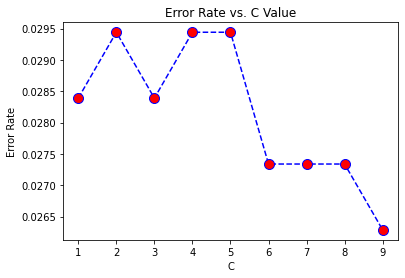

In [37]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [38]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9739    0.9759    0.9749       498
        male     0.9735    0.9713    0.9724       453

    accuracy                         0.9737       951
   macro avg     0.9737    0.9736    0.9737       951
weighted avg     0.9737    0.9737    0.9737       951



In [39]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.975191700496166
rbf  out-of-sample accuracy in SVM:  0.9621451104100947
poly  in-sample accuracy in SVM:  0.9747406405051872
poly  out-of-sample accuracy in SVM:  0.961093585699264
linear  in-sample accuracy in SVM:  0.9711321605773567
linear  out-of-sample accuracy in SVM:  0.9547844374342797
Highest accuracy is 0.9621451104100947 occurs at rbf kernel.


Lowest error is 0.029442691903259727 occurs at C=5.


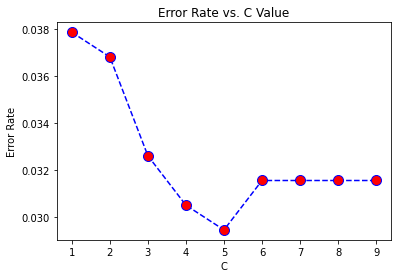

In [40]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [41]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9757    0.9679    0.9718       498
        male     0.9650    0.9735    0.9692       453

    accuracy                         0.9706       951
   macro avg     0.9703    0.9707    0.9705       951
weighted avg     0.9706    0.9706    0.9706       951



## Neural Network
Using neural_network.MLPClassifier to build the model.

In [42]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.03680336487907466 occurs at C=7.


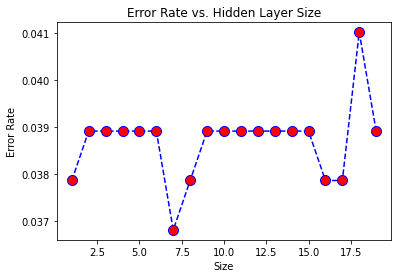

In [43]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [44]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9754    0.9538    0.9645       498
        male     0.9504    0.9735    0.9618       453

    accuracy                         0.9632       951
   macro avg     0.9629    0.9637    0.9631       951
weighted avg     0.9635    0.9632    0.9632       951



Lowest error is 0.03995793901156677 occurs at C=5.


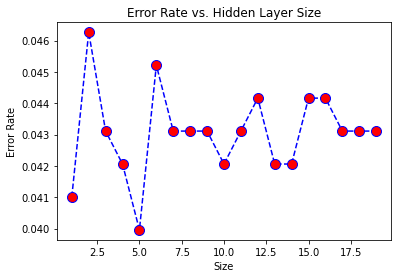

In [45]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [46]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9772    0.9458    0.9612       498
        male     0.9424    0.9757    0.9588       453

    accuracy                         0.9600       951
   macro avg     0.9598    0.9608    0.9600       951
weighted avg     0.9606    0.9600    0.9601       951



We can see that the highest accurracy is 98.74% which is made by XgBoost. XgBoost is a powerful algorithm, and very popular in Data Science competition. Next time I will try to oppotimize the parameters of XgBoost.